In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


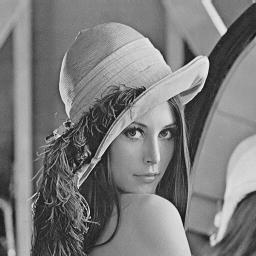

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg1.shape)
#plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg1)

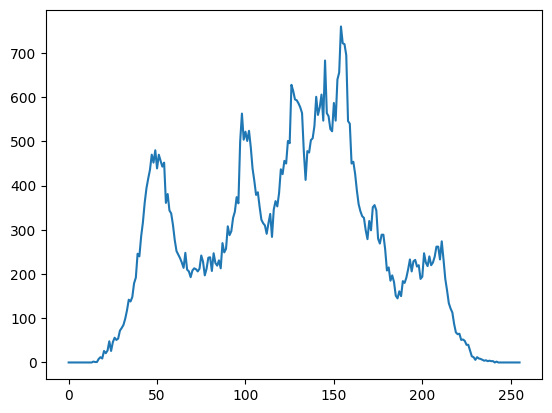

In [ ]:
#히스토그램 만들기

hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])  #이미지, 채널, 마스크, bin의 개수, 범위
plt.plot(hist)

(256, 256)


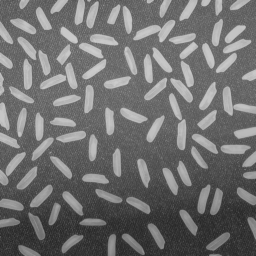

In [ ]:
#임계값 적용하기 (배경과 오브젝트 분리)

img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
#plt.imshow(gImg2, cmap='gray')
cv2_imshow(gImg2)

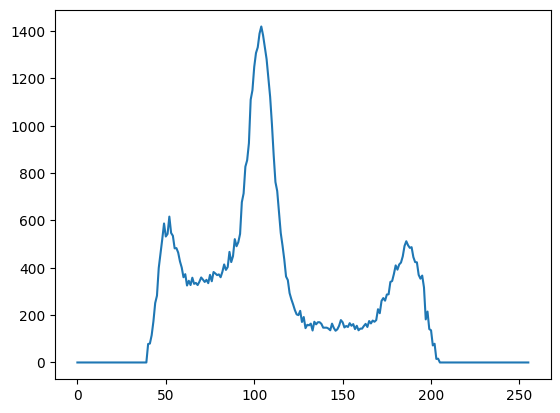

In [ ]:
#임계값 결정 위해 히스토그램 생성

hist = cv2.calcHist([gImg2], [0], None, [256], [0, 255])  #이미지, 채널, 마스크, bin의 개수, 범위
plt.plot(hist)

In [ ]:
gBIn = np.zeros((gImg2.shape[0], gImg2.shape[1]))  #gray binary 이진영상 -> gBIn

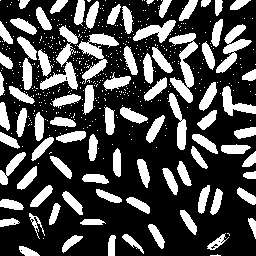

In [ ]:
T = 120  #임계값

for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    if (gImg2[h,w] > T):
      gBIn[h,w] = 255
    else:
      gBIn[h,w] = 0

cv2_imshow(gBIn)

(360, 360)


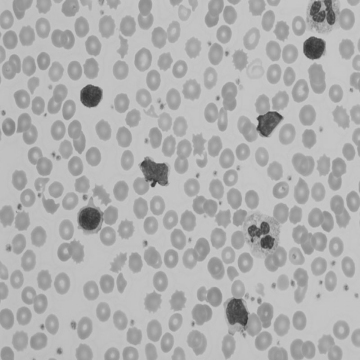

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/cell.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg3 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg3.shape)
#plt.imshow(gImg3, cmap='gray')
cv2_imshow(gImg3)

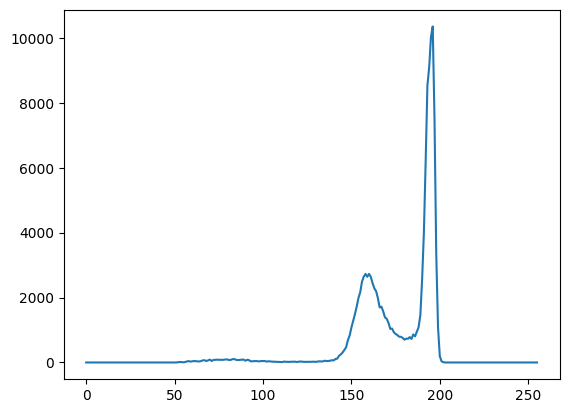

In [ ]:
hist = cv2.calcHist([gImg3], [0], None, [256], [0, 255])  #이미지, 채널, 마스크, bin의 개수, 범위
plt.plot(hist)

In [ ]:
gBIn = np.zeros((gImg3.shape[0], gImg3.shape[1]))

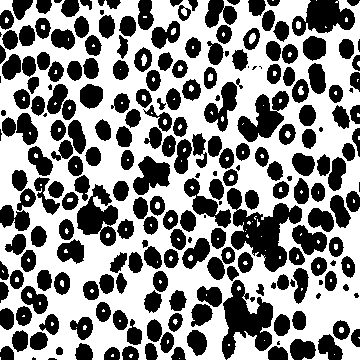

In [ ]:
T = 180

for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if (gImg3[h,w] > T):
      gBIn[h,w] = 255
    else:
      gBIn[h,w] = 0

cv2_imshow(gBIn)

(256, 256)


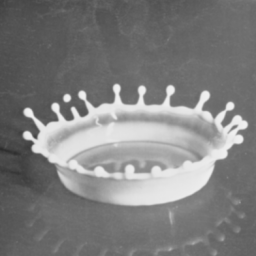

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg4 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg4.shape)
#plt.imshow(gImg4, cmap='gray')
cv2_imshow(gImg4)

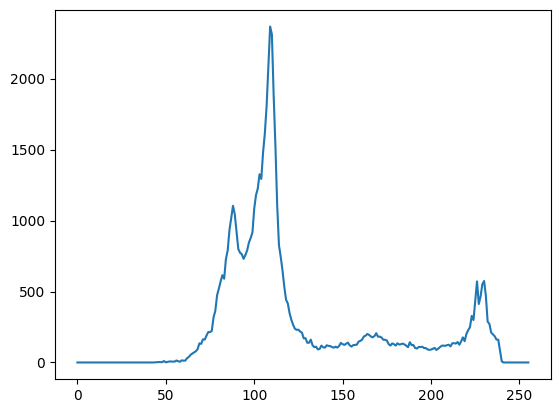

In [ ]:
hist = cv2.calcHist([gImg4], [0], None, [256], [0, 255])  #이미지, 채널, 마스크, bin의 개수, 범위
plt.plot(hist)

In [ ]:
gBIn = np.zeros((gImg4.shape[0], gImg4.shape[1]))

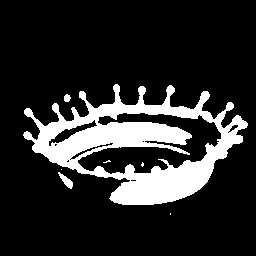

In [ ]:
T = 180

for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    if (gImg4[h,w] > T):
      gBIn[h,w] = 255
    else:
      gBIn[h,w] = 0

cv2_imshow(gBIn)

#조명왜곡 발생

In [ ]:
#전역 임계값 적용하기

T1 = 50
T2 = 0
T0 = 1

outImg = np.zeros((gImg4.shape[0], gImg4.shape[1]))

In [ ]:
def threshold_update(h, w, img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1  #0으로 나누면 오류나기 때문에 방지하기 위해 1로 설정

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if (output[h, w] == 255):
        sum1 = sum1 + img[h,w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h,w]
        count2 = count2 + 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2 = np.int32(avg1 + avg2) / 2
  return T2

In [ ]:
for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    if (gImg4[h,w] > T1):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0

In [ ]:
while True:
  T2 = threshold_update(gImg4.shape[0], gImg4.shape[1], gImg4, outImg, T1)

  if (np.abs(T2 - T1) < T0):  #T0에 수렴한 경우
    for h in range(gImg4.shape[0]):
      for w in range(gImg4.shape[1]):
        if (gImg4[h,w] > T2):
          outImg[h,w] = 255
        else:
          outImg[h,w] = 0
    break;
  else:
    T1 = T2
    for h in range(gImg4.shape[0]):
      for w in range(gImg4.shape[1]):
        if (gImg4[h,w] > T2):
          outImg[h,w] = 255
        else:
          outImg[h,w] = 0

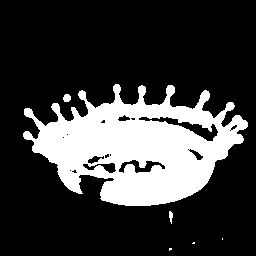

152.5


In [ ]:
cv2_imshow(outImg)
print(T2)